**Dataset**

Mengklasifikasikan 10 object sehari-hari menggunakan [CIFAR Image Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)
List Objek :
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() # Load Dataset

train_images, test_images = train_images / 255.0, test_images / 255.0 # Nilai pixel akan menjadi 0 atau 1

class_names = ['airplane','automobiler','bird','cat','deer','dog','frog','horse','ship','truck']


170498071/170498071 [==============================] - 2s 0us/step


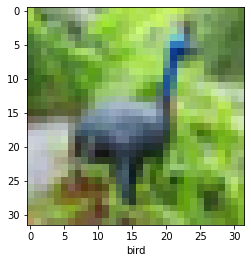

In [7]:
IMG_INDEX = 6 # Ubah untuk mengganti gambar 

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

**Arsitektur CNN**

A stack of Conv2D and MaxPooling2D layers yang diikuti oleh Densely Connected Layers (DCL). Stack akan digunakan untuk mengekstrak fitur dari citra. Fitur kemudian di berikan ke DCL untuk menentukan class citra berdasarkan fitur tadi

Membangun Convolutional Base

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
    
    
    


Layer 1 : Define 32 Filters dengan size 3x3 untuk input data dengan fungsi aktivasi relu untuk setiap operasi konvolusi 

Layer 2 : Melakukan Max Pooling menggunakan sampel 2x2 dan Stride = 2

Other Layer : Menaikkan depth filter menjadi 64 karena data mengecil ketika berada di layer spacial. Layer ini mirip seperti layer 1 dan 2 hanya saja mengambil input feature map dari layer sebelumnya. disini akan dilakukan flatten, yakni mengambil sample 64 menjadi 1 dimensi (1 kolom saja)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Dari hasil diatas dapat dilihat Depth Image naik sementara spacial dimensions berkurang drastis

**Menambahkan Dense Layer**

Setelah fitur di ekstraksi, kita akan mengklasifikasikannya menggunakan Dense Layer.

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Ketika di flatten, shape akan berubah dan diikuti 10 neurons sebagai output. 10 neurons karena setiap kelas adalah 1 neuron

In [12]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.5395 - accuracy: 0.4384 - val_loss: 1.2820 - val_accuracy: 0.5384
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1476 - accuracy: 0.5923 - val_loss: 1.1210 - val_accuracy: 0.6074
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.0018 - accuracy: 0.6490 - val_loss: 0.9898 - val_accuracy: 0.6546
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9017 - accuracy: 0.6832 - val_loss: 0.9499 - val_accuracy: 0.6723
Epoch 5/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.8404 - accuracy: 0.7056 - val_loss: 0.9017 - val_accuracy: 0.6848
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7824 - accuracy: 0.7252 - val_loss: 0.9004 - val_accuracy: 0.6928
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7332 - accuracy: 0.7434 - val_loss: 0.8797 -

**Akurasi Model**



In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.9115 - accuracy: 0.7007 - 4s/epoch - 12ms/step
0.7006999850273132


**Data Augmentation**

Data Augmentation digunakan untuk mencegah overfitting. Data Augmentation secara sederhana adalah melakukan modifikasi kecil terhadap gambar agar dapat dibaca oleh komputer lebih mudah. seperti rotasi, kompresi, dan perubahan warna

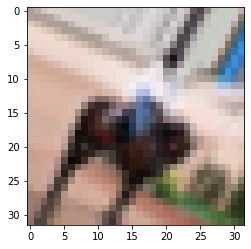

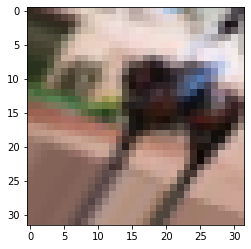

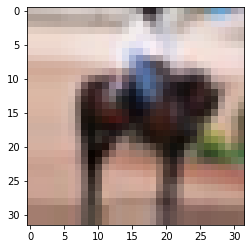

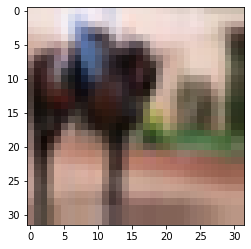

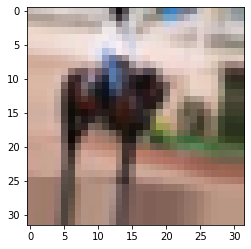

In [20]:
from tensorflow.keras.utils import img_to_array
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# membuat data generator untuk mengubah gambar 
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'

)

# memilih gambar untuk di modifikasi 
test_img = train_images[11]
img = img_to_array(test_img) # mengubah gambar ke bentuk numpy array
img = img.reshape((1,)+ img.shape)

i = 0

for batch in datagen.flow(img, save_prefix = "test", save_format = "jpeg"):
  plt.figure(i)
  plot = plt.imshow(img_to_array(batch[0]))
  i +=1
  if i > 4: # menampilkan 4 buah gambar
    break

plt.show()